# Proprocessing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [9]:
df = pd.read_csv("./data/ai4i2020.csv")  # Adjust path as needed

## Preview

In [3]:
print("📂 Dataset shape:", df.shape)
print("🧾 Column names:", df.columns.tolist())
print("🔍 Sample rows:")
display(df.head())


📂 Dataset shape: (10000, 14)
🧾 Column names: ['UDI', 'Product ID', 'Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']
🔍 Sample rows:


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [5]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# Check for duplicate rows
duplicate_count = df.duplicated().sum()
print("Number of duplicate rows:", duplicate_count)


Missing values per column:
UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64
Number of duplicate rows: 0


In [10]:
# Drop unnecessary columns
df.drop(columns=['UDI', 'Product ID'], inplace=True)

# Check data types
print("Data types:")
print(df.dtypes)

# Encode categorical column 'Type' using one-hot encoding
df = pd.get_dummies(df, columns=['Type'], drop_first=True)

# Convert 'Machine failure' to binary (0 and 1)
df['Machine failure'] = df['Machine failure'].astype(int)

# Recheck data types
print("Data types after encoding:")
print(df.dtypes)


Data types:
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Machine failure              int64
TWF                          int64
HDF                          int64
PWF                          int64
OSF                          int64
RNF                          int64
dtype: object
Data types after encoding:
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Machine failure              int64
TWF                          int64
HDF                          int64
PWF                          int64
OSF                          int64
RNF                          int64
Type_L                        bool
Type_M                        bool
dtype: object


In [11]:
# Save the cleaned dataset
df.to_csv("./data/pred_maintenance_cleaned.csv", index=False)
print("Cleaned dataset saved to ./data/pred_maintenance_cleaned.csv")

Cleaned dataset saved to ./data/pred_maintenance_cleaned.csv



# EDA

In [13]:
# Load cleaned dataset into a new DataFrame
df_clean = pd.read_csv("./data/pred_maintenance_cleaned.csv")
print("Cleaned dataset shape:", df_clean.shape)

Cleaned dataset shape: (10000, 13)


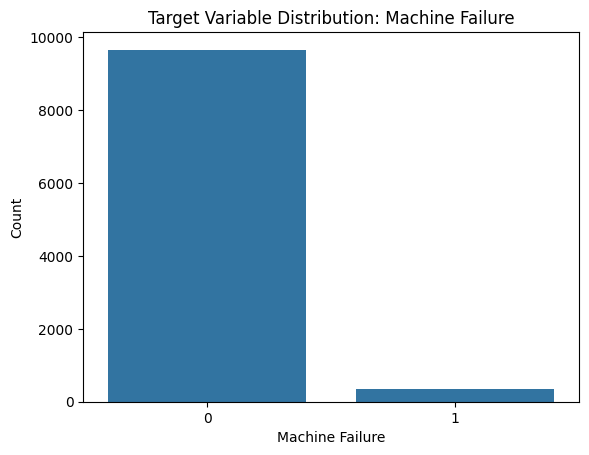

In [14]:
sns.countplot(x='Machine failure', data=df_clean)
plt.title("Target Variable Distribution: Machine Failure")
plt.xlabel("Machine Failure")
plt.ylabel("Count")
plt.show()

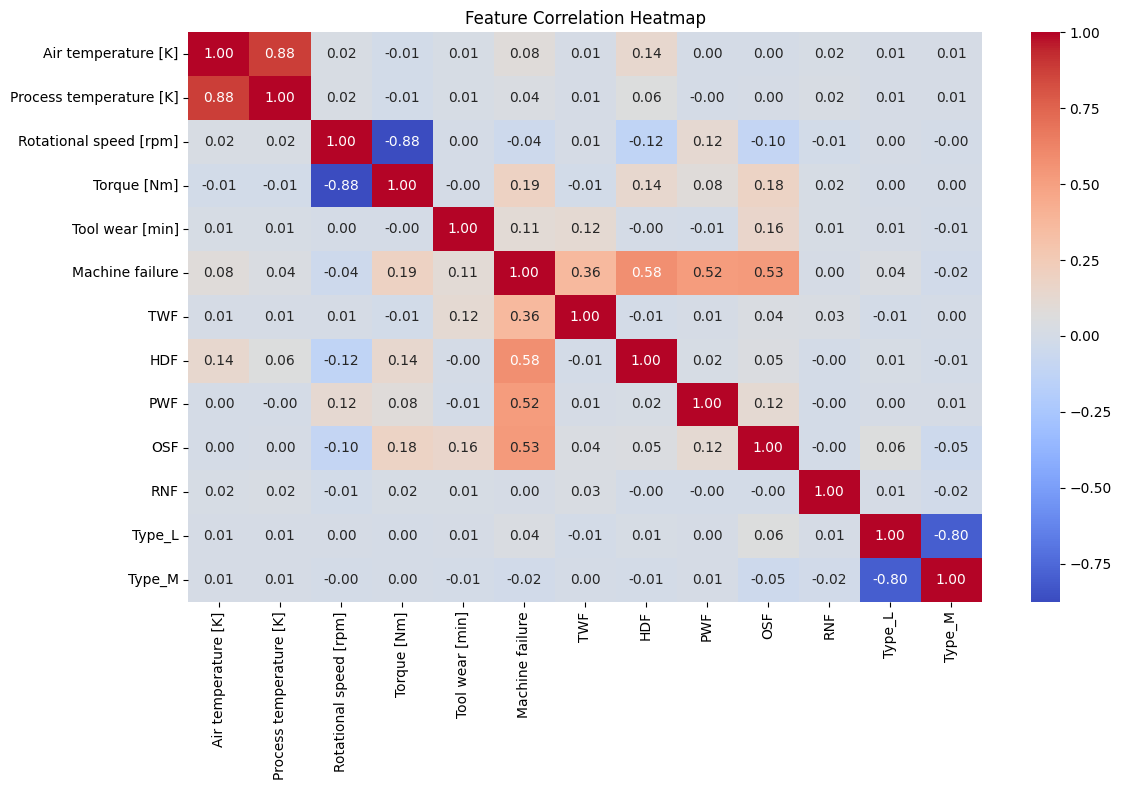

In [15]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_clean.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()
